In [2]:
!pip install openaq

In [103]:
import pandas as pd
import json

from openaq import OpenAQ
import httpx
import shapely

from openaq import OpenAQ

import geopandas as gpd

import pprint

SyntaxError: invalid syntax (360616484.py, line 2)

In [53]:
client = OpenAQ(api_key='0___0')

In [5]:
# Load GeoJSON file
los_angeles = gpd.read_file("../Data/Inputs/Boundary_Shapefile/City_Boundaries.geojson")

In [7]:
print(los_angeles.head())

   OBJECTID  CITY CITY_ID       CITY_TYPE       CITY_NAME CITY_LABEL  \
0     47054  None    None  Unincorporated  Unincorporated         CO   
1     47058  None    None  Unincorporated  Unincorporated         CO   
2     47062  None    None  Unincorporated  Unincorporated         CO   
3     47063  None    None  Unincorporated  Unincorporated         CO   
4     47064  None    None  Unincorporated  Unincorporated         CO   

   COLOR_CODE  ABBR  CITY_NO DESCRIPTN               URL       PHONE  \
0           1  None        0     UNINC  www.lacounty.gov  2139744321   
1           1  None        0     UNINC  www.lacounty.gov  2139744321   
2           1  None        0     UNINC  www.lacounty.gov  2139744321   
3           1  None        0     UNINC  www.lacounty.gov  2139744321   
4           1  None        0     UNINC  www.lacounty.gov  2139744321   

   OF_AREA_SM FEAT_TYPE COMMENT                COLOR_EGIS POPULATION  \
0         0.0      Land    None  Yellow - RGB 255,255,115     

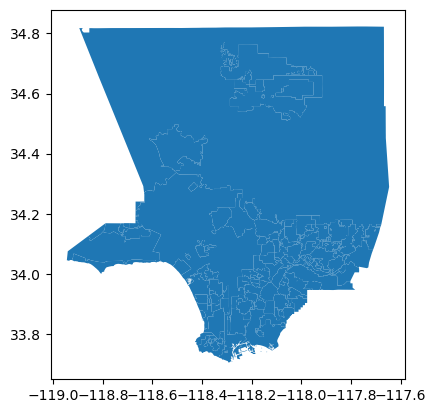

In [8]:
los_angeles.plot();

In [12]:
type(los_angeles)

geopandas.geodataframe.GeoDataFrame

In [57]:
bbox1 = los_angeles.total_bounds

In [58]:
bbox1

array([-118.94470305,   33.70467437, -117.64638598,   34.82330416])

In [59]:
bbox_str = ",".join(map(str, bbox1))
bbox_str

'-118.944703049253,33.7046743723892,-117.646385981235,34.823304156602'

locations = client.locations.list(
    bbox = ",".join(map(str, los_angeles.total_bounds)), limit=1000
)
#pprint.pp(locations)
client.close()

In [62]:
type(locations)

openaq.shared.responses.LocationsResponse

In [63]:
dir(locations)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_serialize',
 'dict',
 'headers',
 'json',
 'meta',
 'read_response',
 'results']

In [65]:
locations.results[0]

Location(id=847, name='South Long Beach', locality=None, timezone='America/Los_Angeles', country=CountryBase(id=155, code='US', name='United States'), owner=OwnerBase(id=4, name='Unknown Governmental Organization'), provider=ProviderBase(id=119, name='AirNow'), is_mobile=False, is_monitor=True, instruments=[InstrumentBase(id=2, name='Government Monitor')], sensors=[SensorBase(id=1502, name='pm25 µg/m³', parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name='PM2.5'))], coordinates=Coordinates(latitude=33.792221, longitude=-118.175278), bounds=[-118.175278, 33.792221, -118.175278, 33.792221], distance=None, datetime_first=Datetime(utc='2016-03-06T20:00:00Z', local='2016-03-06T12:00:00-08:00'), datetime_last=Datetime(utc='2022-05-05T22:00:00Z', local='2022-05-05T15:00:00-07:00'))

In [68]:
results = locations.results

In [69]:
len(results)

386

In [80]:
locations.headers

Headers(x_ratelimit_limit=60, x_ratelimit_remaining=59, x_ratelimit_used=1, x_ratelimit_reset=60)

In [81]:
locations.meta

Meta(name='openaq-api', website='/', page=1, limit=1000, found=386)

In [91]:
locations.results[0]

Location(id=847, name='South Long Beach', locality=None, timezone='America/Los_Angeles', country=CountryBase(id=155, code='US', name='United States'), owner=OwnerBase(id=4, name='Unknown Governmental Organization'), provider=ProviderBase(id=119, name='AirNow'), is_mobile=False, is_monitor=True, instruments=[InstrumentBase(id=2, name='Government Monitor')], sensors=[SensorBase(id=1502, name='pm25 µg/m³', parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name='PM2.5'))], coordinates=Coordinates(latitude=33.792221, longitude=-118.175278), bounds=[-118.175278, 33.792221, -118.175278, 33.792221], distance=None, datetime_first=Datetime(utc='2016-03-06T20:00:00Z', local='2016-03-06T12:00:00-08:00'), datetime_last=Datetime(utc='2022-05-05T22:00:00Z', local='2022-05-05T15:00:00-07:00'))

In [113]:
help(locations.json)

Help on method json in module openaq.shared.responses:

json(encoder: 'ModuleType' = <module 'json' from 'C:\\Users\\User\\anaconda3_1\\lib\\json\\__init__.py'>) -> 'str' method of openaq.shared.responses.LocationsResponse instance
    Serializes response data to JSON string.
    
    Allows for setting encoder module. Defaults to python core `json`, `orjson` also supported with optional install `pip install openaq[orjson]`
    
    Args:
        encoder: JSON serializer module.
    
    Returns:
        string representation of the response in JSON.



locations.json()

In [125]:
locations_json = json.loads(locations.json())

In [126]:
type(locations_json)

dict

locations_json

In [144]:
results = locations_json['results']

In [154]:
la_df = pd.json_normalize(results)

In [155]:
la_df.head()

,id,name,locality,timezone,isMobile,isMonitor,instruments,sensors,bounds,distance,...,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.utc,datetimeFirst.local,datetimeLast.utc,datetimeLast.local,datetimeFirst,datetimeLast
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,...,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00,NaN,NaN
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,...,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,...,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,...,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00,NaN,NaN
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,...,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-07-22T04:00:00Z,2025-07-21T21:00:00-07:00,NaN,NaN


The nested data still looks good

In [156]:
la_df['sensors'][0]

[{'id': 1502,
  'name': 'pm25 µg/m³',
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': 'PM2.5'}}]

In [157]:
la_df['instruments'][0]

[{'id': 2, 'name': 'Government Monitor'}]

In [158]:
la_df[la_df['id']==1036]

,id,name,locality,timezone,isMobile,isMonitor,instruments,sensors,bounds,distance,...,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.utc,datetimeFirst.local,datetimeLast.utc,datetimeLast.local,datetimeFirst,datetimeLast
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,...,119,AirNow,34.0131,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN


In [167]:
la_df.sort_values('id')

,id,name,locality,timezone,isMobile,isMonitor,instruments,sensors,bounds,distance,...,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.utc,datetimeFirst.local,datetimeLast.utc,datetimeLast.local,datetimeFirst,datetimeLast
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,...,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00,NaN,NaN
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,...,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,...,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,...,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00,NaN,NaN
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,...,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-07-22T04:00:00Z,2025-07-21T21:00:00-07:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,4550834,MMCA82021,CA8 - ARB,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 13179311, 'name': 'pm25 µg/m³', 'param...","[-118.8001, 34.28459, -118.8001, 34.28459]",None,...,119,AirNow,34.284590,-118.800100,2025-05-28T18:00:00Z,2025-05-28T11:00:00-07:00,2025-07-22T06:00:00Z,2025-07-21T23:00:00-07:00,NaN,NaN
382,4683223,MMCA82021,CA8 - ARB,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 13288294, 'name': 'pm25 µg/m³', 'param...","[-118.80014, 34.28448, -118.80014, 34.28448]",None,...,119,AirNow,34.284480,-118.800140,2025-06-09T01:00:00Z,2025-06-08T18:00:00-07:00,2025-06-12T00:00:00Z,2025-06-11T17:00:00-07:00,NaN,NaN
383,4869634,Los Angeles - Mid City,None,America/Los_Angeles,False,False,"[{'id': 7, 'name': 'AirGradient Sensor'}]","[{'id': 13437912, 'name': 'pm1 µg/m³', 'parame...","[-118.346382, 34.047822, -118.346382, 34.047822]",None,...,66,AirGradient,34.047822,-118.346382,2025-06-26T19:00:00Z,2025-06-26T12:00:00-07:00,2025-07-22T06:00:00Z,2025-07-21T23:00:00-07:00,NaN,NaN
384,5026276,EBAM-12,SC0,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 13564438, 'name': 'pm10 µg/m³', 'param...","[-118.41222, 34.2615, -118.41222, 34.2615]",None,...,119,AirNow,34.261500,-118.412220,2025-07-09T20:00:00Z,2025-07-09T13:00:00-07:00,2025-07-22T04:00:00Z,2025-07-21T21:00:00-07:00,NaN,NaN


In [169]:
la_df.columns

Index(['id', 'name', 'locality', 'timezone', 'isMobile', 'isMonitor',
       'instruments', 'sensors', 'bounds', 'distance', 'country.id',
       'country.code', 'country.name', 'owner.id', 'owner.name', 'provider.id',
       'provider.name', 'coordinates.latitude', 'coordinates.longitude',
       'datetimeFirst.utc', 'datetimeFirst.local', 'datetimeLast.utc',
       'datetimeLast.local', 'datetimeFirst', 'datetimeLast'],
      dtype='object')

In [173]:
la_df.set_index('id',inplace=True)

In [175]:
la_df.head()

,name,locality,timezone,isMobile,isMonitor,instruments,sensors,bounds,distance,country.id,...,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.utc,datetimeFirst.local,datetimeLast.utc,datetimeLast.local,datetimeFirst,datetimeLast
id,,,,,,,,,,,,,,,,,,,,,
847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,155,...,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00,NaN,NaN
1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,155,...,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,155,...,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,155,...,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00,NaN,NaN
1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,155,...,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-07-22T04:00:00Z,2025-07-21T21:00:00-07:00,NaN,NaN


There seems to be two columns `datetimeFirst` and `datetimeLast` which could be nulls

In [176]:
la_df['datetimeFirst'].unique()

array([nan])

In [177]:
la_df['datetimeLast'].unique()

array([nan])

In [183]:
la_df = la_df.drop(['datetimeFirst','datetimeLast'],axis=1)

In [184]:
la_df.head()

,name,locality,timezone,isMobile,isMonitor,instruments,sensors,bounds,distance,country.id,...,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.utc,datetimeFirst.local,datetimeLast.utc,datetimeLast.local
id,,,,,,,,,,,,,,,,,,,,,
847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,155,...,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00
1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,155,...,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00
1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,155,...,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00
1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,155,...,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00
1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,155,...,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-07-22T04:00:00Z,2025-07-21T21:00:00-07:00


In [186]:
la_df.columns

Index(['name', 'locality', 'timezone', 'isMobile', 'isMonitor', 'instruments',
       'sensors', 'bounds', 'distance', 'country.id', 'country.code',
       'country.name', 'owner.id', 'owner.name', 'provider.id',
       'provider.name', 'coordinates.latitude', 'coordinates.longitude',
       'datetimeFirst.utc', 'datetimeFirst.local', 'datetimeLast.utc',
       'datetimeLast.local'],
      dtype='object')

The `datetimeFirst.utc`, `datetimeLast.utc` and `timezone` columns are also going to be redundant - the entire dataset is in the same timezone.

In [189]:
la_df = la_df.drop(['datetimeFirst.utc', 'datetimeLast.utc', 'timezone'],axis=1)

In [191]:
la_df.head()

,name,locality,isMobile,isMonitor,instruments,sensors,bounds,distance,country.id,country.code,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.local,datetimeLast.local
id,,,,,,,,,,,,,,,,,,,
847,South Long Beach,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T12:00:00-08:00,2022-05-05T15:00:00-07:00
1019,Pasadena,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T12:00:00-08:00,2016-11-09T13:00:00-08:00
1036,Pico Rivera,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T12:00:00-08:00,2016-11-09T13:00:00-08:00
1042,Piru - Pacific,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06T12:00:00-08:00,2020-06-10T14:00:00-07:00
1052,Pomona,Los Angeles-Long Beach-Santa Ana,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06T12:00:00-08:00,2025-07-21T21:00:00-07:00


In [216]:
la_df['sensors'][847]

[{'id': 1502,
  'name': 'pm25 µg/m³',
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': 'PM2.5'}}]

In [207]:
la_df['sensors'][847][0]['name']

'pm25 µg/m³'

I have to look into this more, but I think the 'id' for the sensor is different than the station id, i.e. it is safe to extract this sensor data and map it to the overall station id.

In [222]:
la_df['sensors'][847][0]['parameter']['name']

'pm25'

In [209]:
la_df['sensors']

id
847        [{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...
1019       [{'id': 1837, 'name': 'o3 ppm', 'parameter': {...
1036       [{'id': 1866, 'name': 'o3 ppm', 'parameter': {...
1042       [{'id': 1876, 'name': 'o3 ppm', 'parameter': {...
1052       [{'id': 25500, 'name': 'co ppm', 'parameter': ...
                                 ...                        
4550834    [{'id': 13179311, 'name': 'pm25 µg/m³', 'param...
4683223    [{'id': 13288294, 'name': 'pm25 µg/m³', 'param...
4869634    [{'id': 13437912, 'name': 'pm1 µg/m³', 'parame...
5026276    [{'id': 13564438, 'name': 'pm10 µg/m³', 'param...
5161748    [{'id': 13663636, 'name': 'pm1 µg/m³', 'parame...
Name: sensors, Length: 386, dtype: object

In [210]:
la_df['sensors'][1052][0]['name']

'co ppm'

In [228]:
pollutant = [la_df['sensors'][i][0]['parameter']['name'] for i in la_df.index]

The sensor types for the first 5 stations (sorted by station index asc)

In [229]:
pollutant[:5]

['pm25', 'o3', 'o3', 'o3', 'co']

In [233]:
la_df.insert(loc = 1, column = 'pollutant', value = pollutant)

Now we have an easy to read `pollutant` column indicating what the station monitors. Each station only monitors one type of pollutant.

In [235]:
la_df.head()

,name,pollutant,locality,isMobile,isMonitor,instruments,sensors,bounds,distance,country.id,country.code,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.local,datetimeLast.local
id,,,,,,,,,,,,,,,,,,,,
847,South Long Beach,pm25,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T12:00:00-08:00,2022-05-05T15:00:00-07:00
1019,Pasadena,o3,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T12:00:00-08:00,2016-11-09T13:00:00-08:00
1036,Pico Rivera,o3,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T12:00:00-08:00,2016-11-09T13:00:00-08:00
1042,Piru - Pacific,o3,None,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06T12:00:00-08:00,2020-06-10T14:00:00-07:00
1052,Pomona,co,Los Angeles-Long Beach-Santa Ana,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,155,US,United States,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06T12:00:00-08:00,2025-07-21T21:00:00-07:00


In [236]:
la_df['pollutant'].isna().sum()

0

The vast majority of these stations are monitoring pm1. For a robust map, this would likely be the best option, but it would be good to check spatial distribution.

In [240]:
la_df['pollutant'].value_counts(normalize=True)*100

pollutant
pm1     69.430052
no2     12.176166
pm25     5.440415
o3       5.181347
co       4.404145
pm10     2.072539
no       1.295337
Name: proportion, dtype: float64

In [242]:
la_df[la_df['pollutant'] == 'pm1'].head()

,name,pollutant,locality,isMobile,isMonitor,instruments,sensors,bounds,distance,country.id,country.code,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetimeFirst.local,datetimeLast.local
id,,,,,,,,,,,,,,,,,,,,
290486,8544 - Roybal Lc,pm1,None,False,False,"[{'id': 4, 'name': 'Clarity Sensor'}]","[{'id': 1654133, 'name': 'pm1 µg/m³', 'paramet...","[-118.2548703, 34.06177624, -118.2548703, 34.0...",None,155,US,United States,6,Unknown Community Organization,166,Clarity,34.061776,-118.254870,2022-02-17T17:56:06-08:00,2022-03-11T08:31:39-08:00
290493,5857 - 107Th St El,pm1,None,False,False,"[{'id': 4, 'name': 'Clarity Sensor'}]","[{'id': 1654129, 'name': 'pm1 µg/m³', 'paramet...","[-118.2724937, 33.94018143, -118.2724937, 33.9...",None,155,US,United States,6,Unknown Community Organization,166,Clarity,33.940181,-118.272494,2022-02-17T17:55:41-08:00,2022-03-03T08:39:14-08:00
290494,2945 - Century Pk El,pm1,None,False,False,"[{'id': 4, 'name': 'Clarity Sensor'}]","[{'id': 1654155, 'name': 'pm1 µg/m³', 'paramet...","[-118.3198044, 33.93643353, -118.3198044, 33.9...",None,155,US,United States,6,Unknown Community Organization,166,Clarity,33.936434,-118.319804,2022-02-17T17:54:48-08:00,2022-03-03T09:13:45-08:00
290497,3548 - Elizabeth Learning Ctr,pm1,None,False,False,"[{'id': 4, 'name': 'Clarity Sensor'}]","[{'id': 1654171, 'name': 'pm1 µg/m³', 'paramet...","[-118.1833671, 33.96405384, -118.1833671, 33.9...",None,155,US,United States,6,Unknown Community Organization,166,Clarity,33.964054,-118.183367,2022-02-17T17:53:37-08:00,2022-03-03T13:18:38-08:00
290509,6192 - Ranchito El,pm1,None,False,False,"[{'id': 4, 'name': 'Clarity Sensor'}]","[{'id': 1654197, 'name': 'pm1 µg/m³', 'paramet...","[-118.4338051, 34.21478034, -118.4338051, 34.2...",None,155,US,United States,6,Unknown Community Organization,166,Clarity,34.214780,-118.433805,2022-02-17T17:56:00-08:00,2022-03-22T07:17:54-07:00
